# Outerplanar graphs

A graph is called *outerplanar* if it can be drawn in the plane
with no edge crossings so that all of its vertices belong to the
unbounded face of the drawing.

A graph is outerplanar if and only if all of its 2-connected
components are outerplanar. So we will assume that the graph is
2-connected.

__Proposition:__ If $G$ is an outerplanar graph, then there exists a
vertex of degree 2 in $G$.

To algorithm to test the outerplanarity is a recursive algorithm. It
computes the unbounded face of the outerplanar embedding. Let *G* be a
2-connected graph.

- If the graph $G$ is a 3-cycle, then it is outerplanar and the
  3-cycle is its unbounded face.
- If the graph $G$ contains no vertices of degree 2, then it is
  not outerplanar.
- Let $v$ be a vertex of degree 2 with neighbors $u$ and $w$.
- If vertices $u$ and $w$ are adjacent, let
  $G'=G\setminus\{v\}$. If $u$ and $v$ are not adjacent, let
  $G'=(G\setminus\{v\})\cup\{(u,w)\}$. $G'$ is 2-connected and $G$ is
  outerplanar if and only if $G'$ is outerplanar.
- Recursively compute the unbounded face $F'$ of $G'$. Vertices $u$ and
  $w$ appear as consecutive vertices along $F'$; construct $F$ by
  inserting $v$ between $u$ and $w$ on $F$. $G$ is outerplanar with
  unbounded face $F$.


In [1]:
def outerplanar_test(G):
    """Checks if G is outerplanar and calculates its embedding (ordering of vertices on the unbounded face)
    Arguments:
        - a 2-connected graph G
    Returns:
        - an outer facial cycle if G is outerplanar and an empty list otherwise.
    """
    # End of recursion - `G` is a cycle of length 3
    if len(G.vertices()) == 3:
        return G.vertices()
    
    # find the vertex `x` of minimum degree
    x = min(G.vertices(), key = lambda x: G.degree(x))
    if G.degree(x) > 2:
        return []
    
    # remove `x` and connect its two neighbors `u` an `v`
    u,v = G.neighbors(x)
    H = G.copy()
    H.delete_vertex(x)
    if u not in H.neighbors(v):
        H.add_edge((u, v))
    
    # recursively test of H is outerplanar
    F = outerplanar_test(H)
    
    if F == []:
        return []
    else:
        # extend the outer facial cycle.
        # x should appear between `u` and `v` along `F`
        ui = F.index(u)
        vi = F.index(v)
        if (ui == 0 and vi == len(F) - 1) or (vi == 0 and ui == len(F) - 1):
            F = [x] + F
        elif vi < ui:
            F = F[:ui] + [x] + F[ui:]
        else:
            F = F[:vi] + [x] + F[vi:]
        return F

In [2]:
def outerplanar_drawing(G):
    F = outerplanar_test(G)
    if F != []:
        pos = {}
        for i in range(len(F)):
            pos[F[i]] = (math.cos(2*math.pi*i/len(F)), math.sin(2*math.pi*i/len(F)))
        G.set_pos(pos)

#### Examples

In [3]:
G1 = Graph("O????A@oZOe?M@B?@p?Ep")

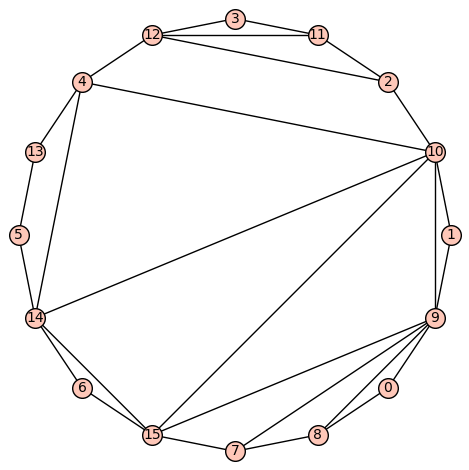

In [4]:
outerplanar_drawing(G1)
G1.plot()

In [5]:
G2 = Graph("L?_GCF?WDoB?@_")

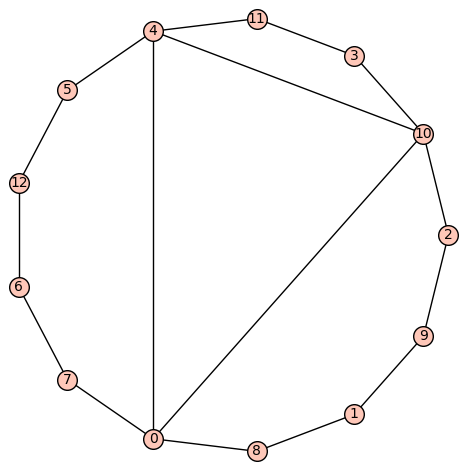

In [6]:
outerplanar_drawing(G2)
G2.plot()

In [7]:
G3 = Graph("J?AMFGpF[G?")

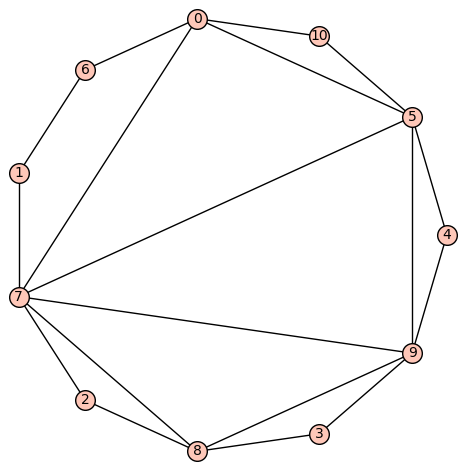

In [8]:
outerplanar_drawing(G3)
G3.plot()

In [9]:
G4 = Graph("K?AMFGpF[G@O")

In [10]:
outerplanar_test(G4)

[]

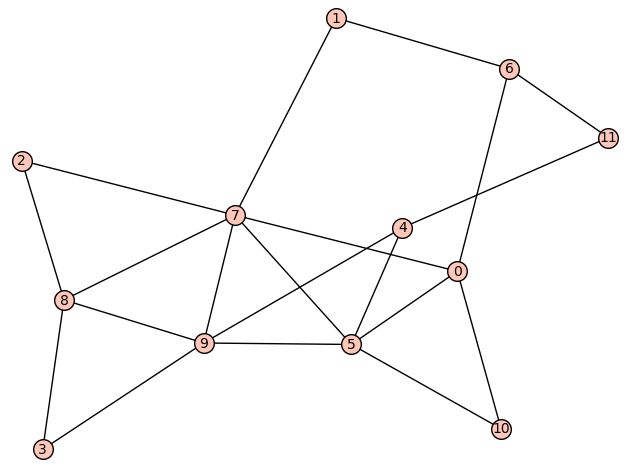

In [11]:
G4.plot()

## Coloring outerplanar graphs

In [35]:
def color_outerplanar_graph(G):
    """
    Return optimal coloring of an outerplanar graph.
    Coloring is a dicitionary mapping a vertex to its color ('red', 'green', 'blue')
    """
    pass

In [23]:
G4 = Graph("K?AMFGpF[G@O")

In [26]:
col3 = color_outerplanar_graph(G3)

In [31]:
def color_graph(G, coloring, **kwargs):
    color_map = {}
    for v, c in coloring.items():
        if c in color_map:
            color_map[c].append(v)
        else:
            color_map[c] = [v]
    return G.plot(vertex_colors=color_map, **kwargs)

In [32]:
def is_coloring(G, coloring):
    for v, u in G.edges(labels=False):
        if coloring[v] == coloring[u]:
            return False
    return True


In [33]:
is_coloring(G3, col3)

True

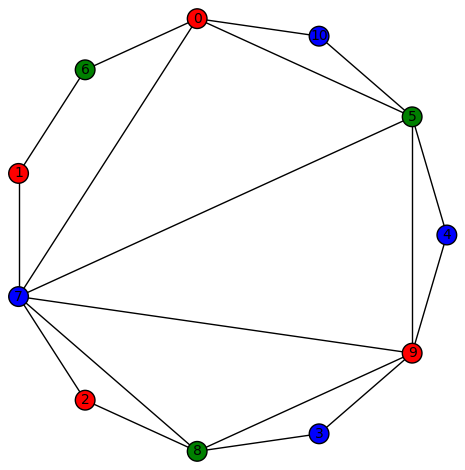

In [34]:
color_graph(G3, col3)